In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


In [ ]:
os.chdir("/gdrive/My Drive/emiroğlu")
!ls

burak  burkay  emodel.h5  emodel.json  Image.png  kaleli  logo.png  yek


In [ ]:
data="/gdrive/My Drive/emiroğlu"
category=["burak","burkay","yek","kaleli"]


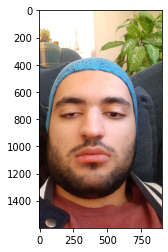

In [ ]:
training_data=[]
def creating_training():
  for i in category:
    path=os.path.join(data,i)
    class_num=category.index(i)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        new_array=cv2.resize(img_array,(50,50))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
creating_training()
    

In [ ]:
for i in category:
  path=os.path.join(data,i)
  class_num=category.index(i)
  for img in os.listdir(path):
    print(img)

XNBJ5535.JPG
BNKU8925.JPG
HCVC6789.JPG
XYID5593.JPG
YFNH9369.JPG
JDSN5074.JPG
YKQF4985.JPG
MXNN2268.JPG
UUNI8390.JPG
CNRY2332.JPG
VIDO8500.JPG
ULIY7565.JPG
BXWY0117.JPG
GYVF7693.JPG
LJCP9267.JPG
HKPS6339.JPG
KBRF9959.JPG
AGTL3865.JPG
CHGK6598.JPG
AUPB5474.JPG
XLZE1130.JPG
NSNK0652.JPG
KNSY1080.JPG
VVHQ5292.JPG
AJIY5027.JPG
MHGO3254.JPG
WHVS5522.JPG
PJYF9752.JPG
KPTT8171.JPG
DIAP1929.JPG
MHTL4148.JPG
LTUH5776.JPG
YKJC0863.JPG
CYSN2776.JPG
EUZP0116.JPG
MYZP0310.JPG
OIIL1859.JPG
HUNC3802.JPG
FWVJ3048.JPG
UQZY9110.JPG
HSMO3218.JPG
PEUH9092.JPG
TKXK9512.JPG
TPWY7163.JPG
JCSG2963.JPG
VPLU7486.JPG
MJDW6458.JPG
USKB8037.JPG
PEBA7926.JPG
CIRU9700.JPG
DYOR6424.JPG
IZNE4874.JPG
TUUG2978.JPG
CVCR1026.JPG
RJTK5325.JPG
SIED0939.JPG
KZII9925.JPG
NCBU8380.JPG
JOSX3919.JPG
XULS4356.JPG
XXAD7668.JPG
TXHY3879.JPG
QWYS2270.JPG
XRLN3105.JPG
YEPU2810.JPG
ALQI3873.JPG
PQLJ5833.JPG
YKWJ8690.JPG
MLBE5841.JPG
VTHX2014.JPG
CZDD6978.JPG
JBQJ7829.JPG
TLSU0007.JPG
UMYQ9352.JPG
AOOD5126.JPG


In [ ]:
import random
random.shuffle(training_data)


In [ ]:
for i in training_data:
  print(i[1])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x=[]
y=[]
for features,labels in training_data:
  x.append(features)
  y.append(labels)

x=np.array(x)
x=np.array(x/255.0)
y=np.array(y)

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 4)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten

emodel=Sequential()
emodel.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(x.shape[1:])))
emodel.add(MaxPool2D(pool_size=(2,2)))
emodel.add(Dropout(0.25))
emodel.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
emodel.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
emodel.add(Dropout(0.25))
emodel.add(Flatten())
emodel.add(Dense(256,activation="relu"))
emodel.add(Dropout(0.25))
emodel.add(Dense(4,activation="sigmoid"))

emodel.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
emodel.fit(x,y,batch_size=64,epochs=100,validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.3667 - accuracy: 0.3833 - val_loss: 1.2639 - val_accuracy: 0.2667
Epoch 2/100
1/1 [==============================] - 0s 171ms/step - loss: 1.5534 - accuracy: 0.2833 - val_loss: 0.9319 - val_accuracy: 0.7333
Epoch 3/100
1/1 [==============================] - 0s 155ms/step - loss: 1.0163 - accuracy: 0.5333 - val_loss: 1.1066 - val_accuracy: 0.4000
Epoch 4/100
1/1 [==============================] - 0s 167ms/step - loss: 1.0712 - accuracy: 0.5833 - val_loss: 0.9061 - val_accuracy: 0.7333
Epoch 5/100
1/1 [==============================] - 0s 171ms/step - loss: 0.9119 - accuracy: 0.6167 - val_loss: 0.6912 - val_accuracy: 0.7333
Epoch 6/100
1/1 [==============================] - 0s 156ms/step - loss: 0.7270 - accuracy: 0.7167 - val_loss: 0.5605 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 163ms/step - loss: 0.5347 - accuracy: 0.9000 - val_loss: 0.5020 - val_accuracy: 1.0000
Epoch 8/100
1/1 

In [ ]:
emodel.save("/drive/My Drive/Emodel.h5")

In [ ]:
import numpy as np
import keras
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

#cascade_path = "/home/alex/Downloads/haarcascade_frontalface_default.xml"
model_param = "/drive/My Drive/Emodel.h5"
#name = "face_mask_detection"
new_model = keras.models.load_model(model_param)

predictions: [[9.3877316e-04 2.5818062e-01 8.8968486e-02 9.9644899e-01]]


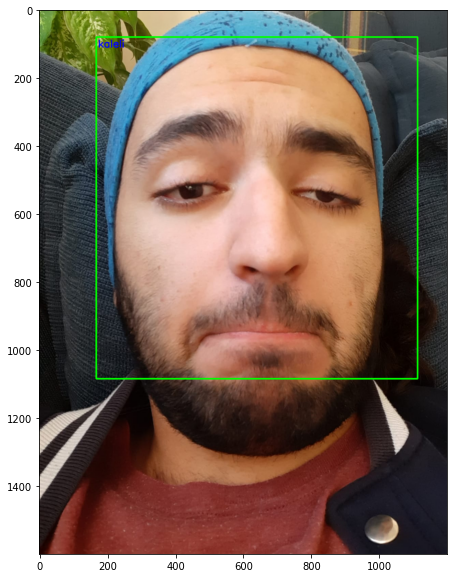

In [ ]:
frame=cv2.imread("/content/drive/MyDrive/emiroğlu/kaleli/XXAD7668.JPG")
face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
dicte = {0: "BURKAY", 1: "burkay", 2: "yek", 3: "kaleli"}
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
faces = face.detectMultiScale(frame, 1.3, 5)
for x, y, w, h in faces:
  roi_face = frame[y:y + h, x:x + w]
  final_array = cv2.resize(roi_face, (50, 50))
  final_array = np.expand_dims(final_array, axis=0)
  final_array = final_array / 255
  predictions = new_model.predict(final_array)
  print("predictions:", predictions)
  maxindex = int(np.argmax(predictions))
  cv2.putText(frame, dicte[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
  cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)




frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))

plt.imshow(frame)
